# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger"> 

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn. 
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

## Multiple linear regression

### Data description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

<div class="alert alert-block alert-danger">
    
1. Import the Boston Housing dataset.
2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.
3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.
4. Split the generated dataset.
5. Normalize the data (excluding the label) using the min max scaler strategy.


<div/>

In [70]:
# importing
import pandas as pd 
data = pd.read_csv("HousingData.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


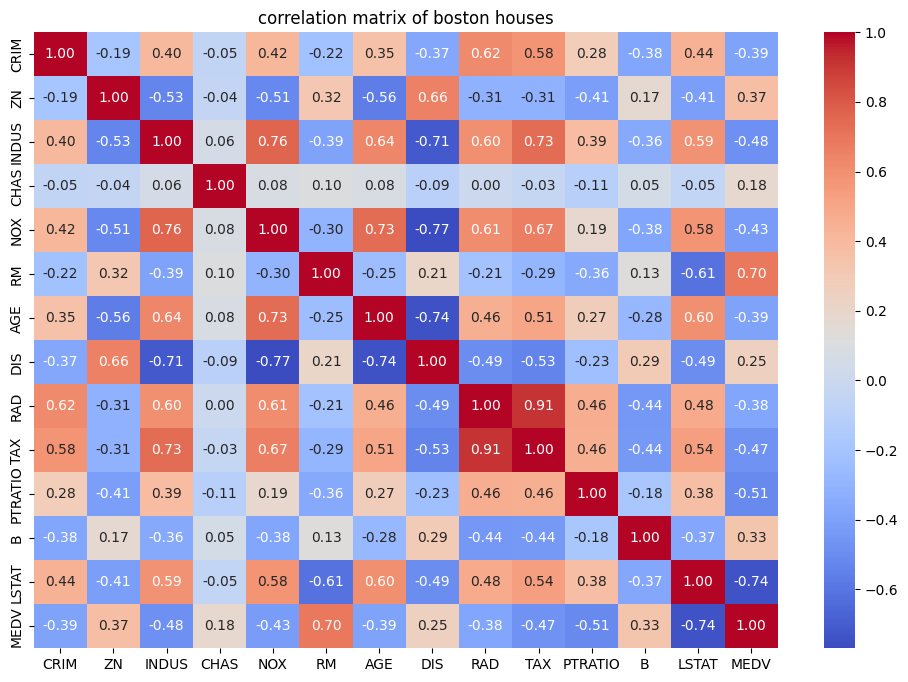

Selected features with correlation > 0.6: Index(['RM', 'LSTAT', 'MEDV'], dtype='object')


In [71]:
# displaying
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

crrmatrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crrmatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix of boston houses")
plt.show()

target = crrmatrix['MEDV'].abs()  

# Select features with correlation above 0.6
highcorr = target[target > 0.6].index

# Display selected features
print("Selected features with correlation > 0.6:", highcorr)




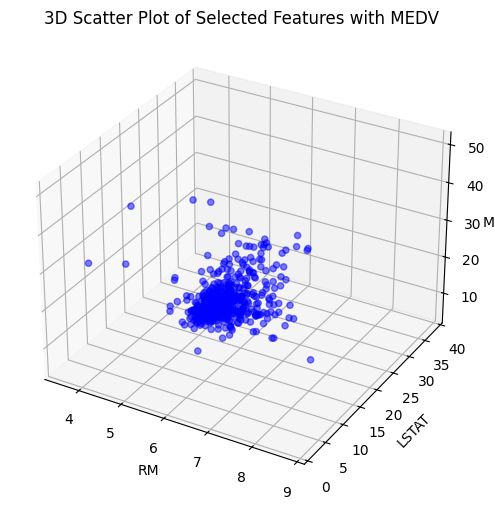

In [72]:
# --- displaying 3D representation ---

from mpl_toolkits.mplot3d import Axes3D

# If we have more than 2 features, select the top 2 highly correlated features for plotting
features_to_plot = highcorr.drop('MEDV').tolist()[:2]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[features_to_plot[0]], data[features_to_plot[1]], data['MEDV'], color='blue', alpha=0.5)
ax.set_xlabel(features_to_plot[0])
ax.set_ylabel(features_to_plot[1])
ax.set_zlabel('MEDV')
plt.title("3D Scatter Plot of Selected Features with MEDV")
plt.show()


In [73]:
# --- spliting data --- 

from sklearn.model_selection import train_test_split

selected_data = data[highcorr]

# Separate features (X) and target (y)
X = selected_data.drop(columns=['MEDV'])
y = selected_data['MEDV']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# --- normalizing data ---
# X normalisé = X-Xmin / Xmax - Xmin
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Fit and transform the training data; transform the test data
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames (optional for easier readability)
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:\n", X_scaled.head())

Scaled Training Data:
            RM     LSTAT
477  0.293065  0.639625
15   0.400854  0.185982
332  0.440919  0.168322
423  0.455562  0.594923
19   0.379093  0.263521


### Data training and evaluation

<div class="alert alert-block alert-danger">
    
1. Use the following lines of code to perform training on the Boston Housing dataset.

<div/>

In [75]:
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Impute missing values in X_scaled and X_test_scaled with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the training and test sets
X_scaled_imputed = imputer.fit_transform(X_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Initialize the SGDRegressor
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001, max_iter=1000, verbose=1)

# Train the model on the imputed training data
sgdr.fit(X_scaled_imputed, y_train)

# Predict on the imputed test set
y_pred = sgdr.predict(X_test_scaled_imputed)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE and the model's coefficients
print(f"Mean Squared Error (MSE): {mse}")
print(f"Model coefficients: {sgdr.coef_}")
print(f"Intercept: {sgdr.intercept_}")


-- Epoch 1
Norm: 0.16, NNZs: 2, Bias: 0.270239, T: 404, Avg. loss: 298.566446
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 2, Bias: 0.452722, T: 808, Avg. loss: 292.188091
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.36, NNZs: 2, Bias: 0.611209, T: 1212, Avg. loss: 287.118107
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 2, Bias: 0.755472, T: 1616, Avg. loss: 282.637069
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.53, NNZs: 2, Bias: 0.889748, T: 2020, Avg. loss: 278.546137
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 2, Bias: 1.016427, T: 2424, Avg. loss: 274.742016
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 2, Bias: 1.136977, T: 2828, Avg. loss: 271.165202
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.74, NNZs: 2, Bias: 1.252384, T: 3232, Avg. loss: 267.775935
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.81, NNZs: 2, Bias: 1.363458, T: 3636, Avg. loss: 264.545908
Total train

c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    

<div/>

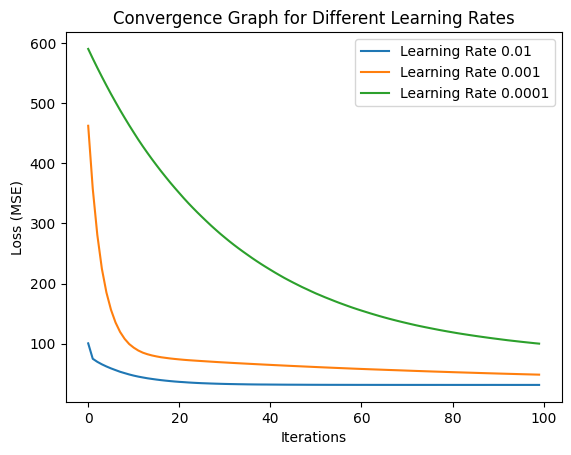

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

learning_rates = [0.01, 0.001, 0.0001]
loss_histories = {}

for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=1, warm_start=True, tol=None)  # Set max_iter=1 for one-step updates and warm_start=True to keep previous solution
    losses = []
    for i in range(100):  # Run 100 iterations manually
        sgdr.fit(X_scaled_imputed, y_train)
        y_pred = sgdr.predict(X_scaled_imputed)
        loss = mean_squared_error(y_train, y_pred)
        losses.append(loss)
    
    loss_histories[lr] = losses
    plt.plot(losses, label=f'Learning Rate {lr}')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Convergence Graph for Different Learning Rates')
plt.legend()
plt.show()


In [77]:
# 3: Vary the Learning Rate and Compare Convergence
# When comparing convergence:

# A higher learning rate (e.g., 0.01) may reach the minimum faster but might oscillate or diverge if it's too high.
# Lower learning rates (0.001, 0.0001) converge more slowly but are usually more stable.
# Observe the balance between convergence speed and stability when selecting the best learning rate.

In [78]:
# Step 4: Why Doesn’t the Graph Reach Maximum Iterations at a Learning Rate of 0.01?
# The graph doesn’t reach the maximum number of iterations with a learning rate of 0.01 because the model may converge early. The tol parameter controls this behavior. When the improvement in the loss is smaller than tol, the training stops early.

In [79]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

learning_rates = [0.01, 0.001, 0.0001]
models = {}
metrics = {}

# Train models with different learning rates and evaluate performance
for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=1000, tol=1e-3)
    sgdr.fit(X_scaled_imputed, y_train)
    
    # Predictions on test set
    y_pred = sgdr.predict(X_test_scaled_imputed)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the model and its metrics
    models[lr] = sgdr
    metrics[lr] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

# Display metrics for each model
for lr, metric in metrics.items():
    print(f"Learning Rate {lr}: {metric}")

# Select the best model based on R-squared (or any other metric of choice)
best_lr = max(metrics, key=lambda lr: metrics[lr]['R-squared'])  # Select model with highest R-squared
best_model = models[best_lr]

print(f"\nBest model learning rate: {best_lr}")
print(f"Best model metrics: {metrics[best_lr]}")


Learning Rate 0.01: {'MAE': np.float64(3.8695981972800992), 'MSE': np.float64(30.93328854403072), 'RMSE': np.float64(5.561770270698954), 'R-squared': 0.5781850163600029}
Learning Rate 0.001: {'MAE': np.float64(4.016074338036862), 'MSE': np.float64(34.7716147834774), 'RMSE': np.float64(5.896746118282302), 'R-squared': 0.525844525060716}
Learning Rate 0.0001: {'MAE': np.float64(5.615969759447264), 'MSE': np.float64(65.90609318974694), 'RMSE': np.float64(8.118256782693372), 'R-squared': 0.10128606012780683}

Best model learning rate: 0.01
Best model metrics: {'MAE': np.float64(3.8695981972800992), 'MSE': np.float64(30.93328854403072), 'RMSE': np.float64(5.561770270698954), 'R-squared': 0.5781850163600029}


c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


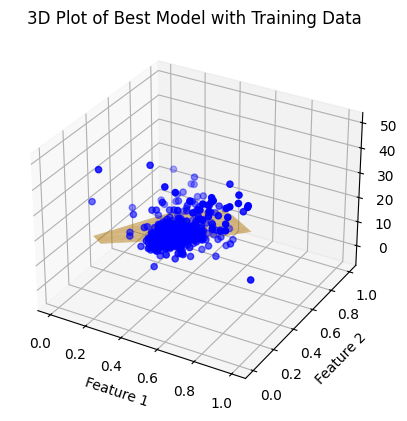

In [80]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Convert X_scaled to a NumPy array if it isn't one already
X_scaled_np = X_scaled_imputed.to_numpy() if isinstance(X_scaled_imputed, pd.DataFrame) else X_scaled_imputed

# Select the first two features for 3D plotting
X_3d = X_scaled_np[:, :2]  # Choose only two features

# Plot the actual vs. predicted values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], y_train, color='blue', label='Actual')  # Actual values

# Generate predictions
preds = best_model.predict(X_scaled_np)
ax.plot_trisurf(X_3d[:, 0], X_3d[:, 1], preds, color='orange', alpha=0.5, label='Predicted')  # Predicted values

# Set plot labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title("3D Plot of Best Model with Training Data")
plt.show()


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
import numpy as np

# Select only the features you want to use
features_to_use = ['RM', 'LSTAT']
X_train_selected = X_train[features_to_use]
X_test_selected = X_test[features_to_use]

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_selected)
X_test_imputed = imputer.transform(X_test_selected)

# Step 2: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 3: Initialize and train the model
iterations = 1000
model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=iterations, tol=1e-4, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 4: Scale and predict on a sample input
sample = np.array([[5.71, 22.6]])  # Example values for RM and LSTAT
sample_imputed = imputer.transform(sample)  # Impute any missing values in the sample
sample_scaled = scaler.transform(sample_imputed)

# Predict the target value
prediction = model.predict(sample_scaled)
print("Predicted MEDV for the sample:", prediction[0])


Predicted MEDV for the sample: 13.978812410511281


c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


![title](sample.png)